In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math  
import random


# Структурни елементи

In [2]:
# regular(симетрични) 3х3
structural_elements_R_3 = np.array (
                      [[[0, 1, 1], 
                        [0, 1, 1], 
                        [0, 1, 1]],
                        
                       [[1, 0, 1], 
                        [1, 0, 1], 
                        [1, 0, 1]],
                        
                       [[1, 1, 0], 
                        [1, 1, 0], 
                        [1, 1, 0]], 
                       
                       [[0, 1, 0], 
                        [0, 1, 0], 
                        [0, 1, 0]], 
                       
                       [[0, 0, 0], 
                        [1, 1, 1], 
                        [1, 1, 1]], 
                       
                       [[0, 0, 0], 
                        [1, 1, 1], 
                        [0, 0, 0]], 
                       
                       [[1, 1, 1], 
                        [1, 1, 1], 
                        [0, 0, 0]], 
                       
                       [[0, 0, 0], 
                        [1, 1, 1], 
                        [0, 0, 0]], 
                       
                       [[0, 1, 1], 
                        [1, 0, 1], 
                        [1, 1, 0]],
                        
                       [[1, 1, 0], 
                        [1, 0, 1], 
                        [0, 1, 1]], 
                       
                       [[0, 0, 1], 
                        [0, 0, 0], 
                        [1, 0, 0]],
                       
                       [[1, 0, 0], 
                        [0, 0, 0], 
                        [0, 0, 1]],
                        
                       [[1, 0, 1], 
                        [0, 0, 0], 
                        [1, 0, 1]], 
                       
                       [[0, 1, 0], 
                        [1, 0, 1], 
                        [0, 1, 0]],
                       
                       [[0, 0, 0], 
                        [0, 1, 0], 
                        [0, 0, 0]],
                       
                       [[0, 0, 0], 
                        [0, 0, 0], 
                        [0, 0, 0]]],
                       np.uint8
                      )

#irregular (несиметрични) 3х3
structural_elements_I_3 = np.array (
                      [[[0, 0, 0],
                        [0, 1, 1],
                        [0, 0, 1]],
                        [[0, 0, 0],
                        [1, 1, 1],
                        [1, 0, 0]],
                        [[1, 0, 0],
                        [0, 1, 1],
                        [1, 0, 1]],
                        [[1, 0, 1],
                        [0, 0, 0],
                        [0, 1, 0]],
                        [[0, 0, 0],
                        [1, 0, 1],
                        [1, 0, 0]],
                        [[0, 1, 0],
                        [0, 0, 0],
                        [1, 1, 1]],
                        [[0, 1, 0],
                        [1, 0, 0],
                        [1, 0, 0]],
                        [[1, 0, 0],
                        [0, 1, 1],
                        [1, 0, 1]],
                        [[1, 1, 1],
                        [0, 1, 1],
                        [0, 0, 1]],
                        [[1, 0, 0],
                        [1, 0, 1],
                        [0, 1, 1]],
                        [[1, 0, 0],
                        [1, 1, 0],
                        [1, 1, 0]],
                        [[0, 0, 1],
                        [0, 0, 1],
                        [0, 0, 0]],
                        [[0, 0, 0],
                        [0, 0, 0],
                        [1, 0, 1]],
                        [[0, 0, 0],
                        [1, 0, 1],
                        [0, 0, 0]],
                        [[0, 0, 0],
                        [1, 1, 0],
                        [1, 0, 0]],
                        [[0, 1, 1],
                        [0, 0, 0],
                        [1, 0, 0]]], 
                       np.uint8
                      )

# regular(симетрични) 5х5
structural_elements_R_5 = np.array([[[1, 0, 0, 0, 1],
 [0, 1, 1, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 0, 1, 1],
 [1, 1, 1, 1, 0]],
[[1, 0, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1]],
[[1, 0, 1, 0, 0],
 [0, 0, 1, 1, 1],
 [1, 1, 1, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0]],
[[0, 0, 1, 1, 1],
 [0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0],
 [1, 0, 0, 0, 1]],
[[1, 1, 1, 0, 1],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1]],
[[0, 1, 0, 0, 1],
 [1, 0, 1, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 1, 1, 0],
 [1, 0, 1, 0, 1]],
[[1, 0, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1]],
[[1, 1, 1, 0, 1],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1]],
[[1, 1, 0, 1, 1],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1],
 [1, 1, 0, 1, 0]],
[[0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 0, 0, 0, 1]],
[[1, 0, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1]],
[[0, 0, 1, 0, 0],
 [0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0],
 [0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0]],
[[1, 1, 0, 0, 1],
 [1, 1, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0]],
[[0, 1, 1, 0, 1],
 [1, 1, 0, 1, 1],
 [1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0]],
[[1, 0, 0, 0, 1],
 [0, 1, 1, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 0, 1, 1],
 [1, 1, 1, 1, 0]],

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]]
, 
  np.uint8
 )


#irregular(несиметрични) 5х5 
structural_elements_I_5 = np.array( 
[[[0, 1, 1, 1, 0],
 [0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1],
 [0, 0, 0, 0, 1]],
[[1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 0, 1],
 [1, 1, 0, 1, 1],
 [0, 0, 0, 0, 0]],
[[1, 0, 0, 0, 1],
 [1, 0, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [0, 1, 0, 1, 1],
 [0, 0, 0, 1, 0]],
[[0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 1, 0]],
[[1, 0, 0, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 1, 0, 0, 1],
 [1, 1, 1, 0, 0],
 [1, 0, 0, 0, 0]],
[[1, 1, 1, 1, 1],
 [0, 0, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 1, 0, 0, 1]],
[[1, 0, 1, 1, 1],
 [0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1],
 [0, 0, 1, 1, 0],
 [1, 0, 1, 1, 1]],
[[1, 0, 1, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 0, 1, 1],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0]],
[[1, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 1, 1]],
[[0, 0, 0, 0, 1],
 [1, 0, 1, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 1, 0, 0, 0],
 [1, 1, 1, 0, 1]],
[[1, 1, 1, 0, 1],
 [0, 0, 0, 1, 1],
 [1, 0, 0, 1, 1],
 [1, 1, 1, 0, 0],
 [0, 1, 0, 1, 1]],
[[0, 1, 0, 1, 0],
 [0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1],
 [1, 0, 1, 1, 1],
 [0, 1, 1, 1, 0]],
[[0, 0, 0, 1, 1],
 [1, 1, 0, 0, 1],
 [1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0]],
[[1, 1, 0, 1, 1],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0]],
[[1, 0, 1, 0, 0],
 [0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0],
 [1, 0, 1, 1, 0],
 [1, 0, 0, 1, 1]],
[[1, 1, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0]]], np.uint8
 )

#regular(симетрични) 7х7
structural_elements_R_7 = np.array([[
[0, 1, 1,1,1,1,1], 
[0, 1, 1,1,1,1,1],
[0, 1, 1,1,1,1,1],
[0, 1, 1,1,1,1,1],
[0, 1, 1,1,1,1,1],
[0, 1, 1,1,1,1,1],
[0, 1, 1,1,1,1,1]
],

[
[1,1, 0,0,0, 1,1], 
[1,1, 0,0,0, 1,1],
[1,1, 0,0,0, 1,1],
[1,1, 0,0,0, 1,1],
[1,1, 0,0,0, 1,1],
[1,1, 0,0,0, 1,1],
[1,1, 0,0,0, 1,1]
],

[
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0], 
[1, 1, 0,0,0, 0, 0]
], 

[
[0,0,0, 0, 0,0, 0], 
[0,0,0, 0, 0,0, 0], 
[0,0,0, 0, 0,0, 0],  
[0,0,0, 0, 0,0, 0], 
[0,0,0, 0, 0,0, 0], 
[0,0,0, 0, 0,0, 0], 
[0,0,0, 0, 0,0, 0] 
], 

[
[1, 1, 1, 1, 1, 1, 1], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 1, 1, 1, 1]
], 

[
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 1, 1, 1, 1], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0]
], 

[
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0]
], 

[
[1, 1, 1, 1, 1, 1, 1], 
[0, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1], 
[0, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 1, 1, 1, 1] 
], 

[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 1, 1, 0, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[1, 1, 1, 1, 1, 1, 1], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 0, 1, 1, 1, 0, 0], 
[0, 0, 0, 1, 0, 0, 0]
],

[
[1,1,1,1,1,1,1], 
[1,1,1,1,1,1,1],
[1,1,1,1,1,0,0],
[1,1,1,1,0,0,0],
[1,1,1,0,0,0,0],
[1,1,0,0,0,0,0],
[1,1,0,0,0,0,0]
],

[
[0,0,0,0, 0,1, 1], 
[0,0,0,0, 0,1, 1],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[1,1,0,0, 0,0, 0],
[1,1,0,0, 0,0, 0]
],

[
[1,1,0,0, 0,0, 0], 
[1,1,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,1, 1],
[0,0,0,0, 0,1, 1]
],

[
[1,1,0,0, 0,1, 1], 
[1,1,0,0, 0,1, 1],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[0,0,0,0, 0,0, 0],
[1,1,0,0, 0,1, 1],
[1,1,0,0, 0,1, 1]
],

[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 1, 0, 0], 
[0, 1, 0, 0, 0, 1, 0], 
[1, 0, 0, 0, 0, 0, 1], 
[0, 1, 0, 0, 0, 1, 0], 
[0, 0, 1, 0, 1, 0, 0], 
[0, 0, 0, 1, 0, 0, 0]
],

[
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0]
],

[
[0, 0, 0, 0, 0, 0, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 1, 1, 1, 1, 1, 0], 
[0, 0, 0, 0, 0, 0, 0]
]], np.uint8
 )

#irregular(несиметрични) 7х7
structural_elements_I_7 = np.array([
[[0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 0]],
[[1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1],
 [1, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0]],
[[1, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1]],
[[1, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1]],
[[1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1],
 [1, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0]],
[[0, 1, 1, 0, 0, 1, 0],
 [0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 0]],
[[0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 0]],
[[0, 1, 1, 0, 0, 1, 0],
 [0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 0]],
[[0, 0, 1, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0]],
[[0, 0, 1, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0]],
[[1, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 1, 0, 0]],
[[0, 0, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 1, 0]],
[[1, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 1, 1]],
[[1, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1]],
[[1, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 1]],
[[0, 0, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 1, 0]]], np.uint8
 )




#Алгоритъм

In [39]:
MAX_GENERATIONS = 50
POPULATION_SIZE = 32
INIT_GENES = 1
GENE_BITS = 8
MAX_GENES = 20
SELECTION_RATE = 0.3
MUTATION_RATE = 0.3
CROSSOVER_RATE = 0.4
ACCURACY = 0.9

class Chromosome:
  fitness = 0

  def __init__(self):
    self.genes = np.random.randint(
      0, 2, size=(INIT_GENES, GENE_BITS)
    )


def mutate(gene):

  index = random.randint(0, len(gene) - 1)
  gene[index] = 1 - gene[index]

  return gene

def mutate_population(population):

  for chromosome in range(len(population)):

    for gene in range(len(population[chromosome].genes)):

      if random.uniform(0, 1) < SELECTION_RATE and random.uniform(0, 1) < MUTATION_RATE:

          population[chromosome].genes[gene] = mutate(population[chromosome].genes[gene])

  return population  


def cross(population, parent1, parent2):

  parent1_point1 = random.randint(0, len(parent1.genes)-1)
  parent1_point2 = random.randint(parent1_point1, len(parent1.genes)-1)

  parent2_point1 = random.randint(0, len(parent2.genes)-1)
  parent2_point2 = random.randint(parent2_point1, len(parent2.genes)-1)

  child1_genes = np.concatenate((parent1.genes[0:parent1_point1 + 1], parent2.genes[parent2_point1:parent2_point2+1], parent1.genes[parent1_point2:]))

  child2_genes = np.concatenate((parent2.genes[0:parent2_point1 + 1], parent1.genes[parent1_point1:parent1_point2+1], parent2.genes[parent2_point2:]))

  if len(child1_genes) > MAX_GENES:
    child1_genes = child1_genes[0:MAX_GENES]

  if len(child2_genes) > MAX_GENES:
    child2_genes = child2_genes[0:MAX_GENES]

  chromosome_child1 = Chromosome()
  chromosome_child1.genes = child1_genes

  chromosome_child2 = Chromosome()
  chromosome_child2.genes = child2_genes
  
  population.append(chromosome_child1)
  population.append(chromosome_child2)


def crossover(population):

  population.sort(key=lambda x: x.fitness, reverse=True)

  cnt_for_crossover = int(SELECTION_RATE * len(population))

  pop_best_chromosomes = int(cnt_for_crossover*0.9)
  pop_worst_chromosomes = cnt_for_crossover - pop_best_chromosomes

  best_chromosomes = population[0:pop_best_chromosomes] + random.sample(population[pop_best_chromosomes:], pop_worst_chromosomes) 

  for parent1 in best_chromosomes:
    for parent2 in best_chromosomes:

      if parent1 == parent2:
        break
      
      if random.uniform(0, 1) < CROSSOVER_RATE:
        cross(population, parent1, parent2)


def fitness_function(current_img, target_img, sum_gg):

  fitness = 0
  rows,cols = current_img.shape
  sum_fg = 0
  sum_ff = 0

  for i in range(rows):
    for j in range(cols):
      sum_fg += current_img[i][j] * target_img[i][j] 
      sum_ff += current_img[i][j] * current_img[i][j]

  if sum_ff == 0:
    return 0

  fitness = (sum_fg)/(np.sqrt(sum_gg*sum_ff))

  return fitness


def parse_chromosome(chromosome, current_img):

  input = current_img.copy()

  for i in range(len(chromosome.genes)):

    gene = chromosome.genes[i]

    structure_size_bin = ''.join(map(str, gene[1:3]))
    structure_size = 0;

    if structure_size_bin in ('00', '11'):
      structure_size = 3
    elif structure_size_bin == '01':
     structure_size = 5
    elif structure_size_bin == '10':
      structure_size = 7

    structure_class = gene[3]

    structure_index_bin = ''.join(map(str, gene[4:7]))
    structure_index = int(structure_index_bin, 2)

    kernel = []
    if structure_size == 3:
      if structure_class == 0:
        kernel = structural_elements_R_3[structure_index]
      else:
        kernel = structural_elements_I_3[structure_index]
    elif structure_size == 5:
      if structure_class == 0:
        kernel = structural_elements_R_5[structure_index]
      else:
        kernel = structural_elements_I_5[structure_index]
    elif structure_size == 7:
      if structure_class == 0:
        kernel = structural_elements_R_7[structure_index]
      else:
        kernel = structural_elements_I_7[structure_index]
  
    if gene[0] == 0:
      input = cv2.erode(input, kernel)
    else:
      input = cv2.dilate(input, kernel)

  return input


def calculate_fitness(population, input_img, target_img, target_img_score):
  for chromosome in population:
    output = parse_chromosome(chromosome, input_img)
    chromosome.fitness = fitness_function(output, target_img, target_img_score)

def calculate_image_value(image):
  rows,cols = image.shape
  value = 0
  for i in range(rows):
    for j in range(cols):
      value += image[i][j] * image[i][j]
  return value


def startGeneticAlgorithm(input_img, target_img):

  target_img_score = calculate_image_value(target_img)

  print("Fitness input image:", fitness_function(input_img, target_img, target_img_score))

  population = [Chromosome() for i in range(POPULATION_SIZE)]

  chromosome_fitness=[]
  best_chromosome = population[0]
  num_generations_after_best_chromosome = 0;

  for i in range(MAX_GENERATIONS):

    num_generations_after_best_chromosome += 1

    if i == 0:
      calculate_fitness(population, input_img, target_img, target_img_score)

    crossover(population)
    mutate_population(population)

    calculate_fitness(population, input_img, target_img, target_img_score)

    population.sort(key=lambda x: x.fitness, reverse=True)

    if population[0].fitness > best_chromosome.fitness:
      num_generations_after_best_chromosome = 0
      best_chromosome = population[0]

    if population[0].fitness >= ACCURACY or num_generations_after_best_chromosome == 10:
      break;

    print("Generation "+str(i)+ " population "+str(POPULATION_SIZE) +" fitness - "+str(population[0].fitness))

    pop_best_size = int(POPULATION_SIZE*0.9)
    pop_worst_size = POPULATION_SIZE - pop_best_size

    population = population[0:pop_best_size] + random.sample(population[pop_best_size:], pop_worst_size) 


  output_img = parse_chromosome(best_chromosome, input_img)
  print("FITNESS :",  best_chromosome.fitness)
  plt.figure(figsize=(30, 10))
  plt.imshow(output_img, 'gray')


#Приложение на алгоритъма

# Пример 1

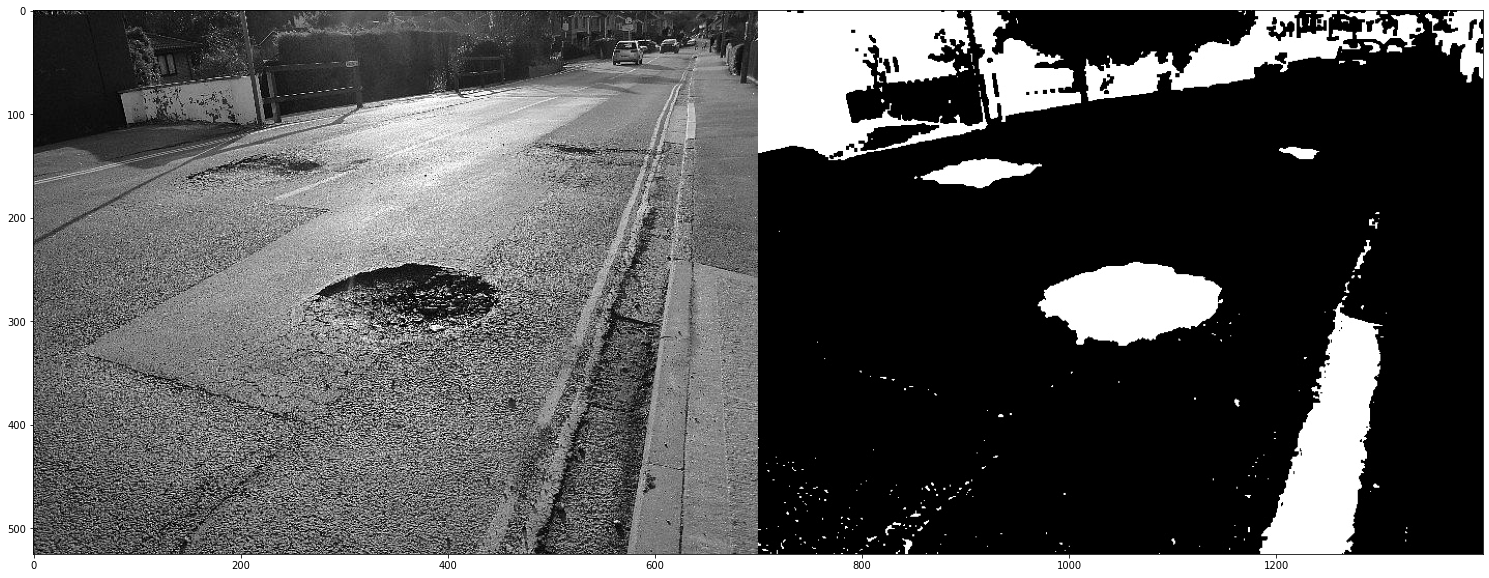

In [34]:
#Изображения
original_img = cv2.imread('original_img_1.jpg', cv2.IMREAD_GRAYSCALE)
target_img = cv2.imread('target_img_1.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30, 10))
plt.imshow(np.concatenate((original_img, target_img), axis = 1), 'gray')

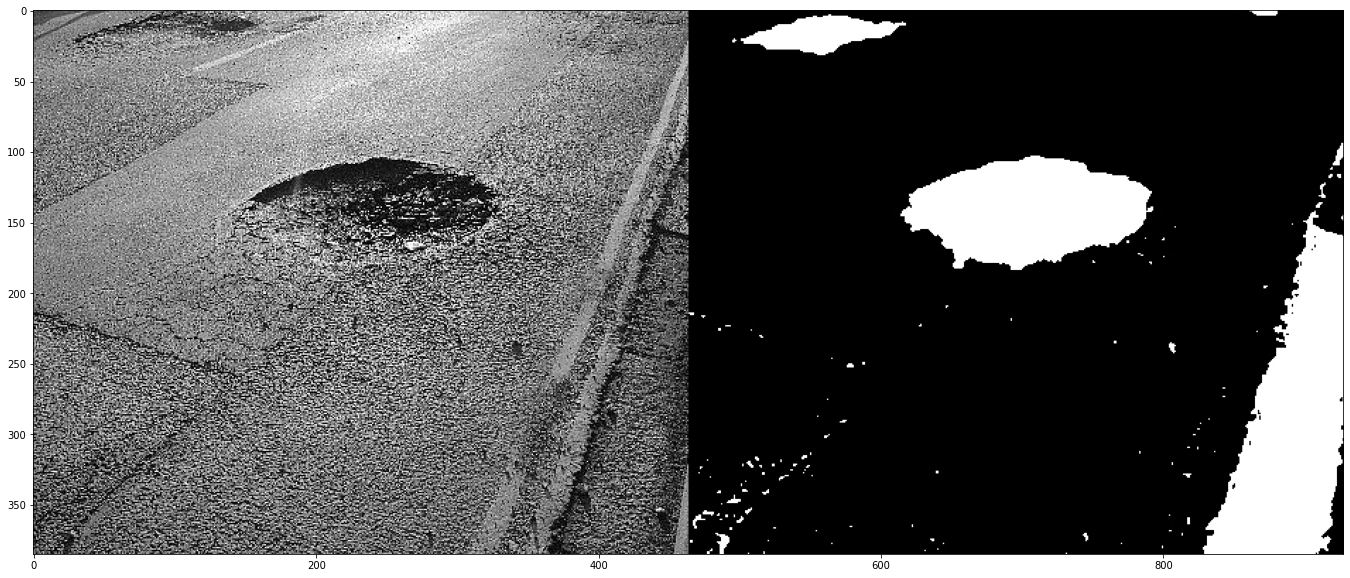

In [35]:
#изрязваме, като оставяме само частта с дупките
original_img = original_img[140:555, 120:584]
target_img = target_img[140:555, 120:584]

plt.figure(figsize=(30, 10))
plt.imshow(np.concatenate((original_img, target_img), axis = 1), 'gray')

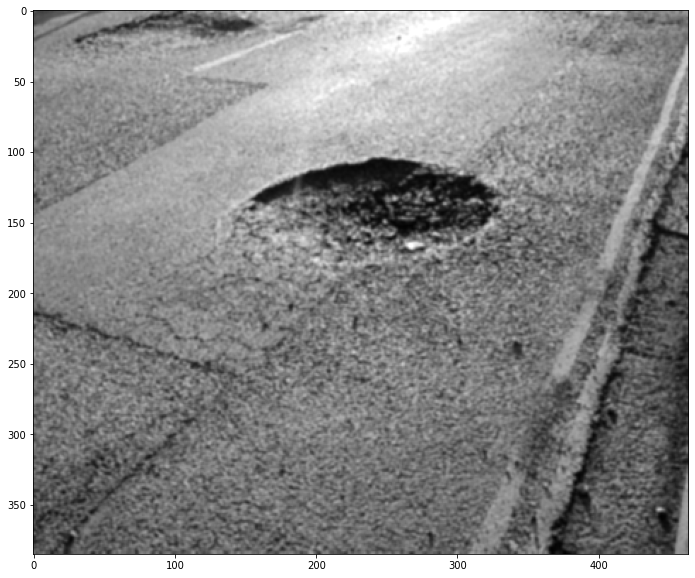

In [36]:
#Прилагаме Гаусов филтър
gaus_3 = (1.0 / 16.0) * np.array([[1, 2, 1],
 [2, 4, 2],
 [1, 2, 1]])

gaus_5 = (1.0 / 243.0) * np.array([[1, 4, 7, 4, 1],
 [4, 16, 26, 16, 4],
 [7, 26, 41, 26, 7],
 [4, 16, 26, 16, 4],
 [1, 4, 7, 4, 1]])

plt.figure(figsize=(30, 10))
original_img = cv2.filter2D(original_img, -1, gaus_5)
plt.imshow(original_img, 'gray')


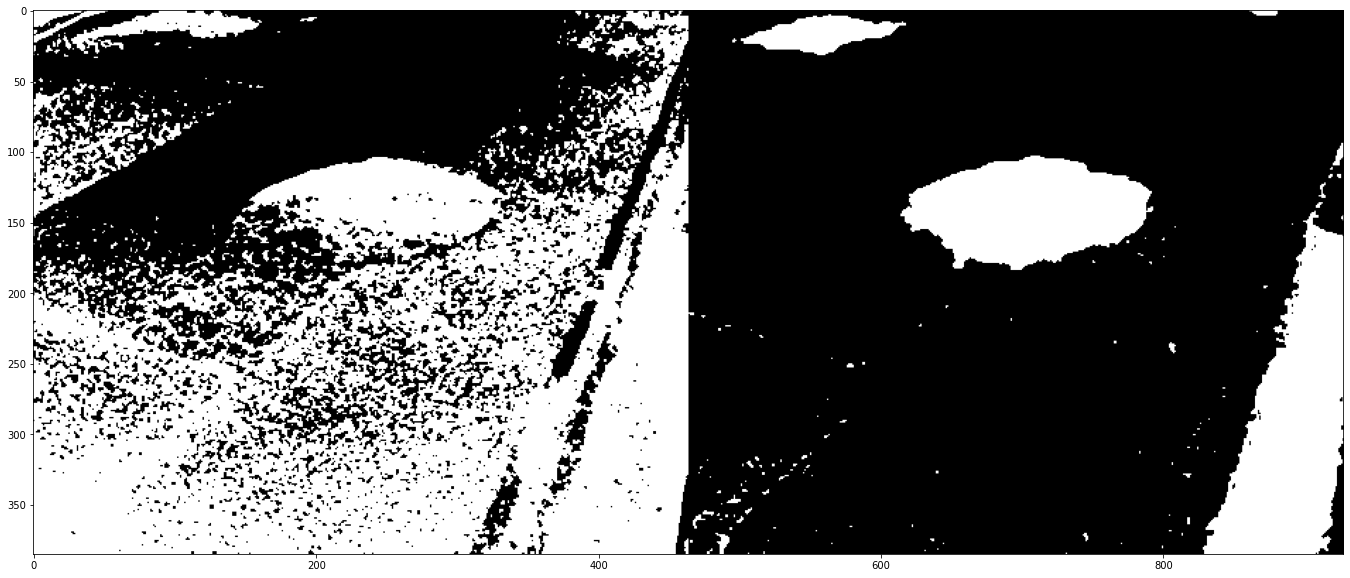

In [37]:
#бинаризация на входните изображения
(t, original_img) = cv2.threshold(original_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
(t, target_img) = cv2.threshold(target_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
original_img = 255 - original_img

plt.figure(figsize=(30, 10))
plt.imshow(np.concatenate((original_img, target_img), axis = 1), 'gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: RuntimeWarning: overflow encountered in ubyte_scalars


Fitness input image: 0.44998790470239897
Generation 0 population 32 fitness - 0.590047532373402
Generation 1 population 32 fitness - 0.5948115930053609
Generation 2 population 32 fitness - 0.590047532373402
Generation 3 population 32 fitness - 0.5965518002251093
Generation 4 population 32 fitness - 0.5965518002251093
Generation 5 population 32 fitness - 0.6164229655193847
Generation 6 population 32 fitness - 0.6202571472737906
Generation 7 population 32 fitness - 0.646275012842425
Generation 8 population 32 fitness - 0.646275012842425
Generation 9 population 32 fitness - 0.6809081751913807
Generation 10 population 32 fitness - 0.6816416652353235
Generation 11 population 32 fitness - 0.6804409979253622
Generation 12 population 32 fitness - 0.6838209345383256
Generation 13 population 32 fitness - 0.6860784720917942
Generation 14 population 32 fitness - 0.6916792604439048
Generation 15 population 32 fitness - 0.6942939302988886
Generation 16 population 32 fitness - 0.6956431001697889
Gene

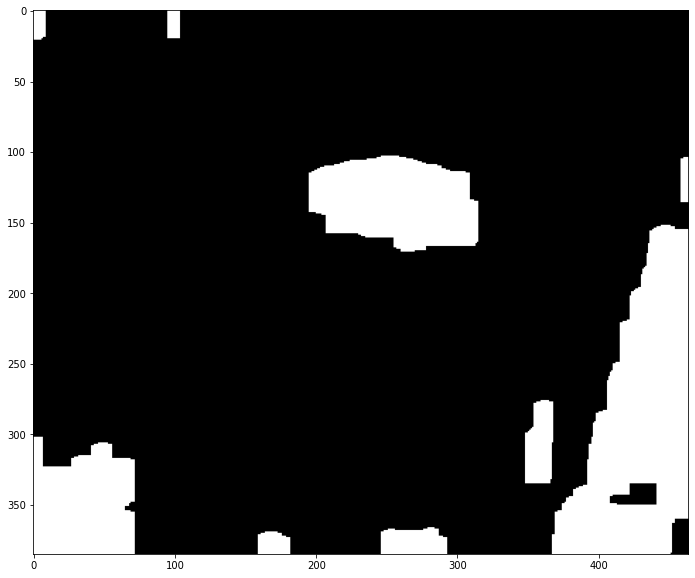

In [40]:
#Прилагаме алгоритъма с размер на популацията 32
startGeneticAlgorithm(original_img, target_img)

#Пример 2

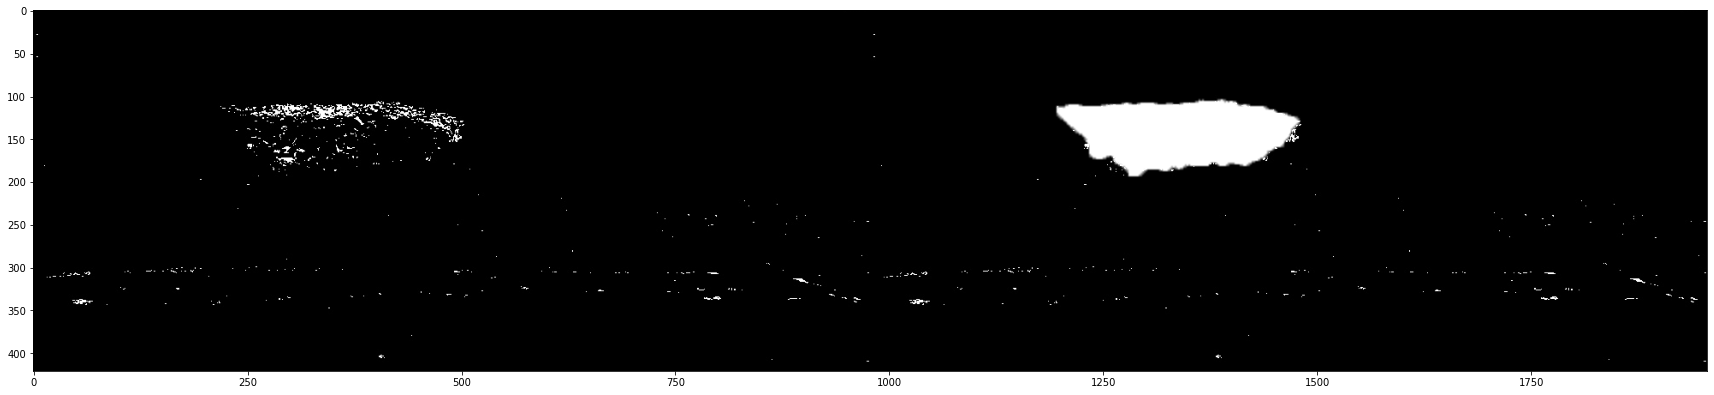

In [43]:
#Изображения
original_img_2 = cv2.imread('original_img_2.jpg', cv2.IMREAD_GRAYSCALE)
target_img_2 = cv2.imread('target_img_2.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30, 10))
plt.imshow(np.concatenate((original_img_2, target_img_2), axis = 1), 'gray')

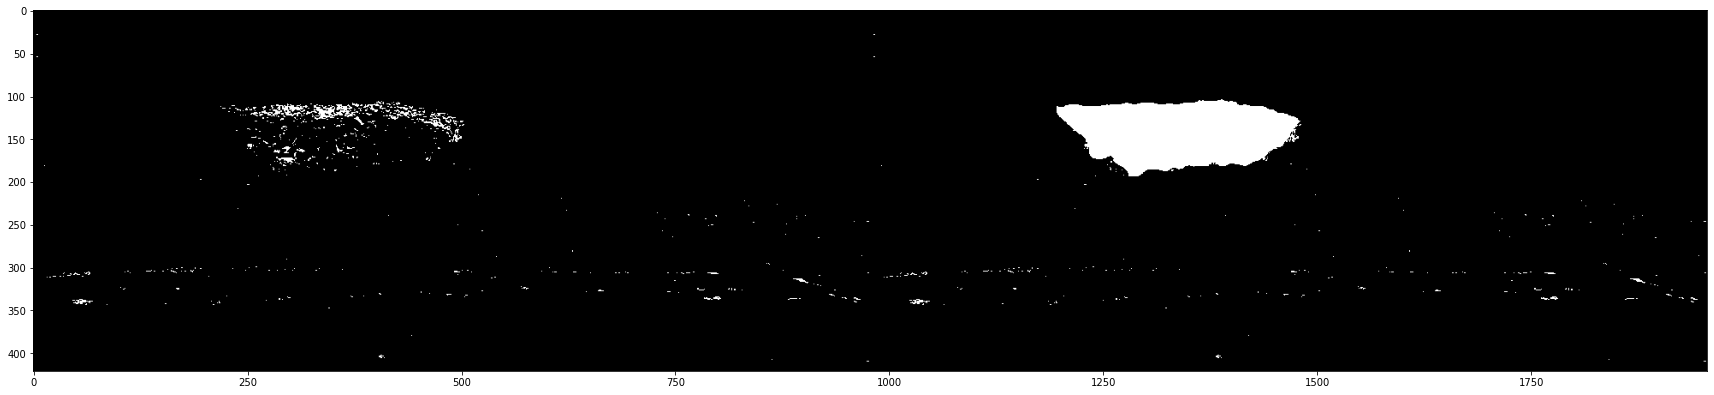

In [44]:
#бинаризация на входните изображения
(t, original_img_2) = cv2.threshold(original_img_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
(t, target_img_2) = cv2.threshold(target_img_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(30, 10))
plt.imshow(np.concatenate((original_img_2, target_img_2), axis = 1), 'gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in ubyte_scalars


Fitness input image: 0.39713178102279245
Generation 0 population 32 fitness - 0.5967606247509644
Generation 1 population 32 fitness - 0.606854572435056
Generation 2 population 32 fitness - 0.6393799094484738
Generation 3 population 32 fitness - 0.640716290308217
Generation 4 population 32 fitness - 0.6652514500221349
Generation 5 population 32 fitness - 0.70005755286564
Generation 6 population 32 fitness - 0.7464730329707379
Generation 7 population 32 fitness - 0.753506850639126
Generation 8 population 32 fitness - 0.7559155615544899
Generation 9 population 32 fitness - 0.7887708793718641
Generation 10 population 32 fitness - 0.7780631820342694
Generation 11 population 32 fitness - 0.8021503424136703
Generation 12 population 32 fitness - 0.806281726418844
Generation 13 population 32 fitness - 0.806281726418844
Generation 14 population 32 fitness - 0.8016852916702861
Generation 15 population 32 fitness - 0.8232922498274934
Generation 16 population 32 fitness - 0.8248073929611623
Generat

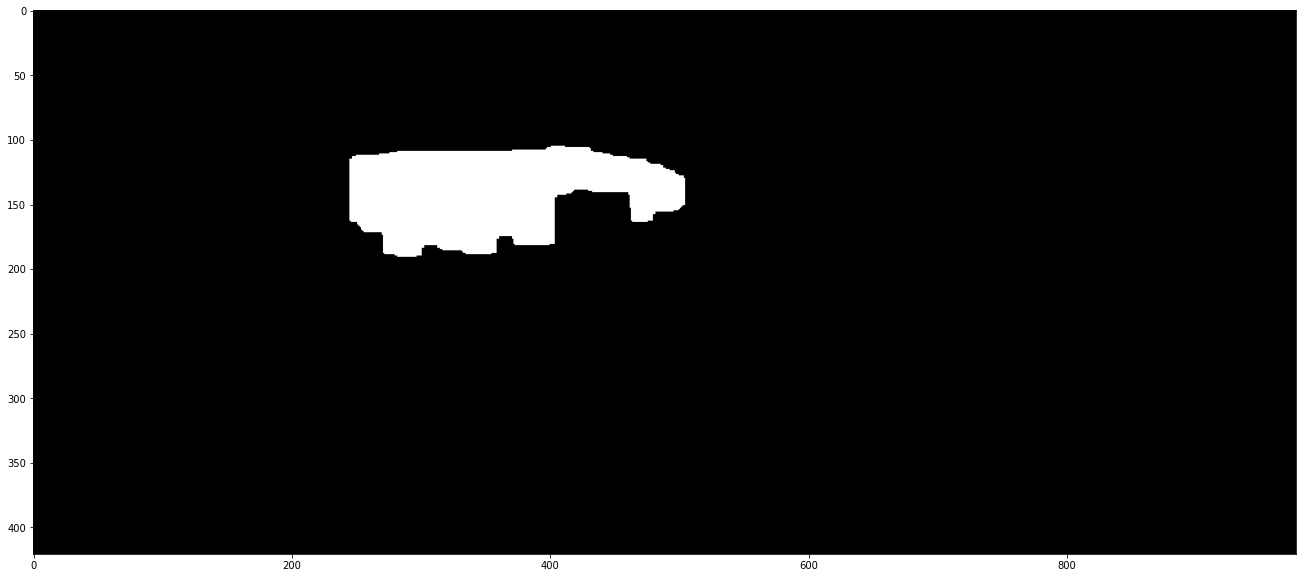

In [45]:
#Прилагаме алгоритъма с размер на популацията 32
startGeneticAlgorithm(original_img_2, target_img_2)